In [1]:
import tensorflow as tf
import numpy as np
import config
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import MachineLearning

In [136]:
data_dir = '/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DifferentData/'
model_dir = '/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/TestModel2'
CFP = config.CFP

In [3]:
config.ReadConfigFile()
import tensorflow as tf
tf.reset_default_graph()
try:
    from importlib import reload
    reload(MachineLearning)
except NameError:
    import MachineLearning
MachineLearning.main()

Machine Learning Training: global variable initialization...
[ Tue Dec  4 02:25:33 2018], epoch [  20], lr[0.10000000] ,loss[2614.3852539062]
[ Tue Dec  4 02:25:33 2018], validation: iter [  20], loss[2594.7109375000]
[ Tue Dec  4 02:25:34 2018], epoch [  40], lr[0.10000000] ,loss[2264.1650390625]
[ Tue Dec  4 02:25:34 2018], validation: iter [  40], loss[2300.7775878906]
[ Tue Dec  4 02:25:34 2018], epoch [  60], lr[0.10000000] ,loss[1893.2908935547]
[ Tue Dec  4 02:25:34 2018], validation: iter [  60], loss[1914.2625732422]
[ Tue Dec  4 02:25:35 2018], epoch [  80], lr[0.10000000] ,loss[1079.8793945312]
[ Tue Dec  4 02:25:35 2018], validation: iter [  80], loss[1061.4367675781]
[ Tue Dec  4 02:25:36 2018], epoch [ 100], lr[0.10000000] ,loss[826.1911010742]
[ Tue Dec  4 02:25:36 2018], validation: iter [ 100], loss[860.8013305664]
[ Tue Dec  4 02:25:37 2018], epoch [ 120], lr[0.10000000] ,loss[789.7851562500]
[ Tue Dec  4 02:25:37 2018], validation: iter [ 120], loss[823.3251342773]
[

[ Tue Dec  4 02:26:13 2018], epoch [1040], lr[0.10000000] ,loss[367.7073059082]
[ Tue Dec  4 02:26:13 2018], validation: iter [1040], loss[376.3499145508]
[ Tue Dec  4 02:26:13 2018], epoch [1060], lr[0.10000000] ,loss[325.5304260254]
[ Tue Dec  4 02:26:13 2018], validation: iter [1060], loss[345.9564819336]
[ Tue Dec  4 02:26:14 2018], epoch [1080], lr[0.10000000] ,loss[309.9929504395]
[ Tue Dec  4 02:26:14 2018], validation: iter [1080], loss[330.4428710938]
[ Tue Dec  4 02:26:15 2018], epoch [1100], lr[0.10000000] ,loss[298.0898437500]
[ Tue Dec  4 02:26:15 2018], validation: iter [1100], loss[318.3244323730]
[ Tue Dec  4 02:26:15 2018], epoch [1120], lr[0.10000000] ,loss[301.2341308594]
[ Tue Dec  4 02:26:15 2018], validation: iter [1120], loss[310.7697448730]
[ Tue Dec  4 02:26:16 2018], epoch [1140], lr[0.10000000] ,loss[282.6331481934]
[ Tue Dec  4 02:26:16 2018], validation: iter [1140], loss[296.7992858887]
[ Tue Dec  4 02:26:16 2018], epoch [1160], lr[0.10000000] ,loss[266.84

[ Tue Dec  4 02:26:45 2018], epoch [2080], lr[0.05000000] ,loss[38.9999008179]
[ Tue Dec  4 02:26:45 2018], validation: iter [2080], loss[49.1988792419]
[ Tue Dec  4 02:26:46 2018], epoch [2100], lr[0.05000000] ,loss[38.8435020447]
[ Tue Dec  4 02:26:46 2018], validation: iter [2100], loss[48.9554710388]
[ Tue Dec  4 02:26:46 2018], epoch [2120], lr[0.05000000] ,loss[38.6955146790]
[ Tue Dec  4 02:26:46 2018], validation: iter [2120], loss[48.7201881409]
[ Tue Dec  4 02:26:47 2018], epoch [2140], lr[0.05000000] ,loss[38.5632667542]
[ Tue Dec  4 02:26:47 2018], validation: iter [2140], loss[48.5094413757]
[ Tue Dec  4 02:26:48 2018], epoch [2160], lr[0.05000000] ,loss[38.4396896362]
[ Tue Dec  4 02:26:48 2018], validation: iter [2160], loss[48.3071899414]
[ Tue Dec  4 02:26:48 2018], epoch [2180], lr[0.05000000] ,loss[38.3176879883]
[ Tue Dec  4 02:26:48 2018], validation: iter [2180], loss[48.1083641052]
[ Tue Dec  4 02:26:49 2018], epoch [2200], lr[0.05000000] ,loss[38.2015914917]
[ T

[ Tue Dec  4 02:27:18 2018], epoch [3120], lr[0.05000000] ,loss[35.4616584778]
[ Tue Dec  4 02:27:18 2018], validation: iter [3120], loss[42.8073806763]
[ Tue Dec  4 02:27:18 2018], epoch [3140], lr[0.05000000] ,loss[35.4011459351]
[ Tue Dec  4 02:27:18 2018], validation: iter [3140], loss[42.6701011658]
[ Tue Dec  4 02:27:19 2018], epoch [3160], lr[0.05000000] ,loss[35.5506324768]
[ Tue Dec  4 02:27:19 2018], validation: iter [3160], loss[42.8710060120]
[ Tue Dec  4 02:27:19 2018], epoch [3180], lr[0.05000000] ,loss[68.2133178711]
[ Tue Dec  4 02:27:19 2018], validation: iter [3180], loss[59.4319915771]
[ Tue Dec  4 02:27:20 2018], epoch [3200], lr[0.05000000] ,loss[36.3915100098]
[ Tue Dec  4 02:27:20 2018], validation: iter [3200], loss[42.0527496338]
[ Tue Dec  4 02:27:21 2018], epoch [3220], lr[0.05000000] ,loss[33.9516410828]
[ Tue Dec  4 02:27:21 2018], validation: iter [3220], loss[41.2273941040]
[ Tue Dec  4 02:27:21 2018], epoch [3240], lr[0.05000000] ,loss[33.3870124817]
[ T

[ Tue Dec  4 02:27:50 2018], epoch [4160], lr[0.02500000] ,loss[31.9999084473]
[ Tue Dec  4 02:27:50 2018], validation: iter [4160], loss[38.1241683960]
[ Tue Dec  4 02:27:51 2018], epoch [4180], lr[0.02500000] ,loss[31.9852924347]
[ Tue Dec  4 02:27:51 2018], validation: iter [4180], loss[38.0790481567]
[ Tue Dec  4 02:27:52 2018], epoch [4200], lr[0.02500000] ,loss[31.9715251923]
[ Tue Dec  4 02:27:52 2018], validation: iter [4200], loss[38.0344200134]
[ Tue Dec  4 02:27:52 2018], epoch [4220], lr[0.02500000] ,loss[31.9557723999]
[ Tue Dec  4 02:27:52 2018], validation: iter [4220], loss[37.9903259277]
[ Tue Dec  4 02:27:53 2018], epoch [4240], lr[0.02500000] ,loss[31.9416809082]
[ Tue Dec  4 02:27:53 2018], validation: iter [4240], loss[37.9470787048]
[ Tue Dec  4 02:27:54 2018], epoch [4260], lr[0.02500000] ,loss[31.9284973145]
[ Tue Dec  4 02:27:54 2018], validation: iter [4260], loss[37.9050865173]
[ Tue Dec  4 02:27:55 2018], epoch [4280], lr[0.02500000] ,loss[31.9159317017]
[ T

[ Tue Dec  4 02:28:26 2018], epoch [5200], lr[0.02500000] ,loss[31.5674381256]
[ Tue Dec  4 02:28:26 2018], validation: iter [5200], loss[36.5615158081]
[ Tue Dec  4 02:28:26 2018], epoch [5220], lr[0.02500000] ,loss[31.5604095459]
[ Tue Dec  4 02:28:26 2018], validation: iter [5220], loss[36.5302505493]
[ Tue Dec  4 02:28:27 2018], epoch [5240], lr[0.02500000] ,loss[31.5534648895]
[ Tue Dec  4 02:28:27 2018], validation: iter [5240], loss[36.5041809082]
[ Tue Dec  4 02:28:28 2018], epoch [5260], lr[0.02500000] ,loss[31.5478534698]
[ Tue Dec  4 02:28:28 2018], validation: iter [5260], loss[36.4784317017]
[ Tue Dec  4 02:28:28 2018], epoch [5280], lr[0.02500000] ,loss[31.5420570374]
[ Tue Dec  4 02:28:28 2018], validation: iter [5280], loss[36.4545211792]
[ Tue Dec  4 02:28:29 2018], epoch [5300], lr[0.02500000] ,loss[31.5949020386]
[ Tue Dec  4 02:28:29 2018], validation: iter [5300], loss[36.5413055420]
[ Tue Dec  4 02:28:29 2018], epoch [5320], lr[0.02500000] ,loss[36.3502616882]
[ T

[ Tue Dec  4 02:28:55 2018], epoch [6240], lr[0.01250000] ,loss[31.4412555695]
[ Tue Dec  4 02:28:55 2018], validation: iter [6240], loss[36.0106964111]
[ Tue Dec  4 02:28:56 2018], epoch [6260], lr[0.01250000] ,loss[31.4385643005]
[ Tue Dec  4 02:28:56 2018], validation: iter [6260], loss[35.9989662170]
[ Tue Dec  4 02:28:56 2018], epoch [6280], lr[0.01250000] ,loss[31.4361057281]
[ Tue Dec  4 02:28:56 2018], validation: iter [6280], loss[35.9875259399]
[ Tue Dec  4 02:28:57 2018], epoch [6300], lr[0.01250000] ,loss[31.4336051941]
[ Tue Dec  4 02:28:57 2018], validation: iter [6300], loss[35.9757843018]
[ Tue Dec  4 02:28:57 2018], epoch [6320], lr[0.01250000] ,loss[31.4305152893]
[ Tue Dec  4 02:28:57 2018], validation: iter [6320], loss[35.9646682739]
[ Tue Dec  4 02:28:58 2018], epoch [6340], lr[0.01250000] ,loss[31.4286384583]
[ Tue Dec  4 02:28:58 2018], validation: iter [6340], loss[35.9531745911]
[ Tue Dec  4 02:28:58 2018], epoch [6360], lr[0.01250000] ,loss[31.4262733459]
[ T

[ Tue Dec  4 02:29:24 2018], epoch [7280], lr[0.01250000] ,loss[31.3413314819]
[ Tue Dec  4 02:29:24 2018], validation: iter [7280], loss[35.5242195129]
[ Tue Dec  4 02:29:25 2018], epoch [7300], lr[0.01250000] ,loss[31.3402538300]
[ Tue Dec  4 02:29:25 2018], validation: iter [7300], loss[35.5169715881]
[ Tue Dec  4 02:29:25 2018], epoch [7320], lr[0.01250000] ,loss[31.3381786346]
[ Tue Dec  4 02:29:25 2018], validation: iter [7320], loss[35.5096931458]
[ Tue Dec  4 02:29:26 2018], epoch [7340], lr[0.01250000] ,loss[31.3655681610]
[ Tue Dec  4 02:29:26 2018], validation: iter [7340], loss[35.5611915588]
[ Tue Dec  4 02:29:27 2018], epoch [7360], lr[0.01250000] ,loss[34.2216873169]
[ Tue Dec  4 02:29:27 2018], validation: iter [7360], loss[37.8348159790]
[ Tue Dec  4 02:29:28 2018], epoch [7380], lr[0.01250000] ,loss[31.3651771545]
[ Tue Dec  4 02:29:28 2018], validation: iter [7380], loss[35.5490112305]
[ Tue Dec  4 02:29:28 2018], epoch [7400], lr[0.01250000] ,loss[31.3801364899]
[ T

[ Tue Dec  4 02:30:00 2018], epoch [8320], lr[0.00625000] ,loss[31.2876548767]
[ Tue Dec  4 02:30:00 2018], validation: iter [8320], loss[35.3481025696]
[ Tue Dec  4 02:30:01 2018], epoch [8340], lr[0.00625000] ,loss[31.2867603302]
[ Tue Dec  4 02:30:01 2018], validation: iter [8340], loss[35.3447418213]
[ Tue Dec  4 02:30:01 2018], epoch [8360], lr[0.00625000] ,loss[31.2862415314]
[ Tue Dec  4 02:30:01 2018], validation: iter [8360], loss[35.3411788940]
[ Tue Dec  4 02:30:02 2018], epoch [8380], lr[0.00625000] ,loss[31.2856082916]
[ Tue Dec  4 02:30:02 2018], validation: iter [8380], loss[35.3376884460]
[ Tue Dec  4 02:30:03 2018], epoch [8400], lr[0.00625000] ,loss[31.2846317291]
[ Tue Dec  4 02:30:03 2018], validation: iter [8400], loss[35.3342666626]
[ Tue Dec  4 02:30:04 2018], epoch [8420], lr[0.00625000] ,loss[31.2843933105]
[ Tue Dec  4 02:30:04 2018], validation: iter [8420], loss[35.3308296204]
[ Tue Dec  4 02:30:04 2018], epoch [8440], lr[0.00625000] ,loss[31.2835578918]
[ T

[ Tue Dec  4 02:30:31 2018], epoch [9360], lr[0.00625000] ,loss[31.2380180359]
[ Tue Dec  4 02:30:31 2018], validation: iter [9360], loss[35.1755142212]
[ Tue Dec  4 02:30:32 2018], epoch [9380], lr[0.00625000] ,loss[31.2370052338]
[ Tue Dec  4 02:30:32 2018], validation: iter [9380], loss[35.1720390320]
[ Tue Dec  4 02:30:32 2018], epoch [9400], lr[0.00625000] ,loss[31.2359619141]
[ Tue Dec  4 02:30:32 2018], validation: iter [9400], loss[35.1684455872]
[ Tue Dec  4 02:30:33 2018], epoch [9420], lr[0.00625000] ,loss[31.2353992462]
[ Tue Dec  4 02:30:33 2018], validation: iter [9420], loss[35.1646804810]
[ Tue Dec  4 02:30:33 2018], epoch [9440], lr[0.00625000] ,loss[31.2609291077]
[ Tue Dec  4 02:30:33 2018], validation: iter [9440], loss[35.1885757446]
[ Tue Dec  4 02:30:34 2018], epoch [9460], lr[0.00625000] ,loss[31.4016170502]
[ Tue Dec  4 02:30:34 2018], validation: iter [9460], loss[35.1620254517]
[ Tue Dec  4 02:30:35 2018], epoch [9480], lr[0.00625000] ,loss[31.3007125854]
[ T

[ Tue Dec  4 02:31:00 2018], epoch [10400], lr[0.00312500] ,loss[31.1947574615]
[ Tue Dec  4 02:31:00 2018], validation: iter [10400], loss[35.0695533752]
[ Tue Dec  4 02:31:01 2018], epoch [10420], lr[0.00312500] ,loss[31.1941852570]
[ Tue Dec  4 02:31:01 2018], validation: iter [10420], loss[35.0678024292]
[ Tue Dec  4 02:31:01 2018], epoch [10440], lr[0.00312500] ,loss[31.1935997009]
[ Tue Dec  4 02:31:01 2018], validation: iter [10440], loss[35.0659484863]
[ Tue Dec  4 02:31:02 2018], epoch [10460], lr[0.00312500] ,loss[31.1930084229]
[ Tue Dec  4 02:31:02 2018], validation: iter [10460], loss[35.0642318726]
[ Tue Dec  4 02:31:02 2018], epoch [10480], lr[0.00312500] ,loss[31.1923732758]
[ Tue Dec  4 02:31:02 2018], validation: iter [10480], loss[35.0624885559]
[ Tue Dec  4 02:31:03 2018], epoch [10500], lr[0.00312500] ,loss[31.1918182373]
[ Tue Dec  4 02:31:03 2018], validation: iter [10500], loss[35.0607414246]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimil

[ Tue Dec  4 02:31:28 2018], epoch [11440], lr[0.00312500] ,loss[31.1545639038]
[ Tue Dec  4 02:31:28 2018], validation: iter [11440], loss[34.9687385559]
[ Tue Dec  4 02:31:29 2018], epoch [11460], lr[0.00312500] ,loss[31.1535511017]
[ Tue Dec  4 02:31:29 2018], validation: iter [11460], loss[34.9665641785]
[ Tue Dec  4 02:31:29 2018], epoch [11480], lr[0.00312500] ,loss[31.1526908875]
[ Tue Dec  4 02:31:29 2018], validation: iter [11480], loss[34.9644203186]
[ Tue Dec  4 02:31:30 2018], epoch [11500], lr[0.00312500] ,loss[31.1518135071]
[ Tue Dec  4 02:31:30 2018], validation: iter [11500], loss[34.9622879028]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_11500']
[ Tue Dec  4 02:31:31 2018], epoch [11520], lr[0.00312500] ,loss[31.1511020660]
[ Tue Dec  4 02:31:31 2018], validation: iter [11520], loss[34.9601516724]
[ Tue Dec  4 02:31:31 2018], epoch [11540], lr[0.00312500] ,loss[31.1502666473]
[ Tue Dec  4 02:31:

[ Tue Dec  4 02:31:55 2018], epoch [12480], lr[0.00156250] ,loss[31.1165218353]
[ Tue Dec  4 02:31:55 2018], validation: iter [12480], loss[34.8866310120]
[ Tue Dec  4 02:31:56 2018], epoch [12500], lr[0.00156250] ,loss[31.1158103943]
[ Tue Dec  4 02:31:56 2018], validation: iter [12500], loss[34.8854675293]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_12500']
[ Tue Dec  4 02:31:57 2018], epoch [12520], lr[0.00156250] ,loss[31.1159515381]
[ Tue Dec  4 02:31:57 2018], validation: iter [12520], loss[34.8844757080]
[ Tue Dec  4 02:31:57 2018], epoch [12540], lr[0.00156250] ,loss[31.1145629883]
[ Tue Dec  4 02:31:57 2018], validation: iter [12540], loss[34.8832855225]
[ Tue Dec  4 02:31:58 2018], epoch [12560], lr[0.00156250] ,loss[31.1136894226]
[ Tue Dec  4 02:31:58 2018], validation: iter [12560], loss[34.8824043274]
[ Tue Dec  4 02:31:58 2018], epoch [12580], lr[0.00156250] ,loss[31.1135501862]
[ Tue Dec  4 02:31:

Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_13500']
[ Tue Dec  4 02:32:22 2018], epoch [13520], lr[0.00156250] ,loss[31.0810279846]
[ Tue Dec  4 02:32:22 2018], validation: iter [13520], loss[34.8192214966]
[ Tue Dec  4 02:32:23 2018], epoch [13540], lr[0.00156250] ,loss[31.0819149017]
[ Tue Dec  4 02:32:23 2018], validation: iter [13540], loss[34.8161849976]
[ Tue Dec  4 02:32:23 2018], epoch [13560], lr[0.00156250] ,loss[31.1056327820]
[ Tue Dec  4 02:32:23 2018], validation: iter [13560], loss[34.8729362488]
[ Tue Dec  4 02:32:24 2018], epoch [13580], lr[0.00156250] ,loss[31.0844936371]
[ Tue Dec  4 02:32:24 2018], validation: iter [13580], loss[34.8139152527]
[ Tue Dec  4 02:32:24 2018], epoch [13600], lr[0.00156250] ,loss[31.0769786835]
[ Tue Dec  4 02:32:24 2018], validation: iter [13600], loss[34.8131752014]
[ Tue Dec  4 02:32:25 2018], epoch [13620], lr[0.00156250] ,loss[31.0768127441]
[ Tue Dec  4 02:32:

[ Tue Dec  4 02:32:49 2018], epoch [14540], lr[0.00078125] ,loss[31.0498046875]
[ Tue Dec  4 02:32:49 2018], validation: iter [14540], loss[34.7508392334]
[ Tue Dec  4 02:32:49 2018], epoch [14560], lr[0.00078125] ,loss[31.0491771698]
[ Tue Dec  4 02:32:49 2018], validation: iter [14560], loss[34.7497863770]
[ Tue Dec  4 02:32:50 2018], epoch [14580], lr[0.00078125] ,loss[31.0482006073]
[ Tue Dec  4 02:32:50 2018], validation: iter [14580], loss[34.7486953735]
[ Tue Dec  4 02:32:50 2018], epoch [14600], lr[0.00078125] ,loss[31.0479202271]
[ Tue Dec  4 02:32:50 2018], validation: iter [14600], loss[34.7476310730]
[ Tue Dec  4 02:32:51 2018], epoch [14620], lr[0.00078125] ,loss[31.0473709106]
[ Tue Dec  4 02:32:51 2018], validation: iter [14620], loss[34.7466239929]
[ Tue Dec  4 02:32:51 2018], epoch [14640], lr[0.00078125] ,loss[31.0466041565]
[ Tue Dec  4 02:32:51 2018], validation: iter [14640], loss[34.7455062866]
[ Tue Dec  4 02:32:52 2018], epoch [14660], lr[0.00078125] ,loss[31.04

[ Tue Dec  4 02:33:16 2018], epoch [15580], lr[0.00078125] ,loss[31.0211524963]
[ Tue Dec  4 02:33:16 2018], validation: iter [15580], loss[34.6899909973]
[ Tue Dec  4 02:33:16 2018], epoch [15600], lr[0.00078125] ,loss[31.0199909210]
[ Tue Dec  4 02:33:16 2018], validation: iter [15600], loss[34.6887550354]
[ Tue Dec  4 02:33:17 2018], epoch [15620], lr[0.00078125] ,loss[31.0188884735]
[ Tue Dec  4 02:33:17 2018], validation: iter [15620], loss[34.6876640320]
[ Tue Dec  4 02:33:17 2018], epoch [15640], lr[0.00078125] ,loss[31.0190296173]
[ Tue Dec  4 02:33:17 2018], validation: iter [15640], loss[34.6861038208]
[ Tue Dec  4 02:33:18 2018], epoch [15660], lr[0.00078125] ,loss[31.0180511475]
[ Tue Dec  4 02:33:18 2018], validation: iter [15660], loss[34.6846466064]
[ Tue Dec  4 02:33:19 2018], epoch [15680], lr[0.00078125] ,loss[31.0175476074]
[ Tue Dec  4 02:33:19 2018], validation: iter [15680], loss[34.6830787659]
[ Tue Dec  4 02:33:20 2018], epoch [15700], lr[0.00078125] ,loss[31.01

[ Tue Dec  4 02:33:48 2018], epoch [16620], lr[0.00039063] ,loss[30.9979152679]
[ Tue Dec  4 02:33:48 2018], validation: iter [16620], loss[34.6372718811]
[ Tue Dec  4 02:33:48 2018], epoch [16640], lr[0.00039063] ,loss[30.9972400665]
[ Tue Dec  4 02:33:48 2018], validation: iter [16640], loss[34.6364173889]
[ Tue Dec  4 02:33:49 2018], epoch [16660], lr[0.00039063] ,loss[30.9969959259]
[ Tue Dec  4 02:33:49 2018], validation: iter [16660], loss[34.6356391907]
[ Tue Dec  4 02:33:49 2018], epoch [16680], lr[0.00039063] ,loss[30.9967193604]
[ Tue Dec  4 02:33:49 2018], validation: iter [16680], loss[34.6348190308]
[ Tue Dec  4 02:33:50 2018], epoch [16700], lr[0.00039063] ,loss[30.9962005615]
[ Tue Dec  4 02:33:50 2018], validation: iter [16700], loss[34.6340065002]
[ Tue Dec  4 02:33:50 2018], epoch [16720], lr[0.00039063] ,loss[30.9954071045]
[ Tue Dec  4 02:33:50 2018], validation: iter [16720], loss[34.6332664490]
[ Tue Dec  4 02:33:51 2018], epoch [16740], lr[0.00039063] ,loss[30.99

[ Tue Dec  4 02:34:15 2018], epoch [17660], lr[0.00039063] ,loss[30.9781208038]
[ Tue Dec  4 02:34:15 2018], validation: iter [17660], loss[34.5972709656]
[ Tue Dec  4 02:34:15 2018], epoch [17680], lr[0.00039063] ,loss[30.9775867462]
[ Tue Dec  4 02:34:15 2018], validation: iter [17680], loss[34.5963363647]
[ Tue Dec  4 02:34:16 2018], epoch [17700], lr[0.00039063] ,loss[30.9773998260]
[ Tue Dec  4 02:34:16 2018], validation: iter [17700], loss[34.5954437256]
[ Tue Dec  4 02:34:16 2018], epoch [17720], lr[0.00039063] ,loss[30.9772682190]
[ Tue Dec  4 02:34:16 2018], validation: iter [17720], loss[34.5944938660]
[ Tue Dec  4 02:34:17 2018], epoch [17740], lr[0.00039063] ,loss[30.9769325256]
[ Tue Dec  4 02:34:17 2018], validation: iter [17740], loss[34.5934944153]
[ Tue Dec  4 02:34:17 2018], epoch [17760], lr[0.00039063] ,loss[30.9762802124]
[ Tue Dec  4 02:34:17 2018], validation: iter [17760], loss[34.5926094055]
[ Tue Dec  4 02:34:18 2018], epoch [17780], lr[0.00039063] ,loss[30.97

[ Tue Dec  4 02:34:44 2018], epoch [18700], lr[0.00019531] ,loss[30.9629249573]
[ Tue Dec  4 02:34:44 2018], validation: iter [18700], loss[34.5658340454]
[ Tue Dec  4 02:34:44 2018], epoch [18720], lr[0.00019531] ,loss[30.9628028870]
[ Tue Dec  4 02:34:44 2018], validation: iter [18720], loss[34.5653457642]
[ Tue Dec  4 02:34:45 2018], epoch [18740], lr[0.00019531] ,loss[30.9625606537]
[ Tue Dec  4 02:34:45 2018], validation: iter [18740], loss[34.5647354126]
[ Tue Dec  4 02:34:45 2018], epoch [18760], lr[0.00019531] ,loss[30.9624347687]
[ Tue Dec  4 02:34:45 2018], validation: iter [18760], loss[34.5641937256]
[ Tue Dec  4 02:34:46 2018], epoch [18780], lr[0.00019531] ,loss[30.9621505737]
[ Tue Dec  4 02:34:46 2018], validation: iter [18780], loss[34.5635490417]
[ Tue Dec  4 02:34:46 2018], epoch [18800], lr[0.00019531] ,loss[30.9619369507]
[ Tue Dec  4 02:34:46 2018], validation: iter [18800], loss[34.5629806519]
[ Tue Dec  4 02:34:47 2018], epoch [18820], lr[0.00019531] ,loss[30.96

[ Tue Dec  4 02:35:13 2018], epoch [19740], lr[0.00019531] ,loss[30.9495220184]
[ Tue Dec  4 02:35:13 2018], validation: iter [19740], loss[34.5318145752]
[ Tue Dec  4 02:35:13 2018], epoch [19760], lr[0.00019531] ,loss[30.9493064880]
[ Tue Dec  4 02:35:13 2018], validation: iter [19760], loss[34.5314865112]
[ Tue Dec  4 02:35:14 2018], epoch [19780], lr[0.00019531] ,loss[30.9492015839]
[ Tue Dec  4 02:35:14 2018], validation: iter [19780], loss[34.5311393738]
[ Tue Dec  4 02:35:14 2018], epoch [19800], lr[0.00019531] ,loss[30.9489307404]
[ Tue Dec  4 02:35:14 2018], validation: iter [19800], loss[34.5305786133]
[ Tue Dec  4 02:35:15 2018], epoch [19820], lr[0.00019531] ,loss[30.9488220215]
[ Tue Dec  4 02:35:15 2018], validation: iter [19820], loss[34.5301055908]
[ Tue Dec  4 02:35:15 2018], epoch [19840], lr[0.00019531] ,loss[30.9486217499]
[ Tue Dec  4 02:35:15 2018], validation: iter [19840], loss[34.5294952393]
[ Tue Dec  4 02:35:16 2018], epoch [19860], lr[0.00019531] ,loss[30.94

In [5]:
config.ReadConfigFile()
sys.argv[1] = 'evaluation'
# config.ResetValue('MachineLearning','normalization','False')
# config.ResetValue('MLEvaluation','observation_source',data_dir)
# config.ResetValue('MLEvaluation','data_source',data_dir)
# config.ResetValue('MachineLearning','save_dir',model_dir)
import tensorflow as tf
tf.reset_default_graph()
from importlib import reload
reload(MachineLearning)
pred,loss = MachineLearning.test()

saver restore from:/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_20000
INFO:tensorflow:Restoring parameters from /Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_20000
Predict complete, cost [  0] seconds


In [7]:
loss

26.019687292857927

In [8]:
pred

array([[5.3869743e+01, 3.5332367e-02, 5.0378479e+01, 1.6044672e+02,
        3.8933717e-02],
       [5.2307961e+01, 3.5442010e-02, 4.8833618e+01, 1.6179877e+02,
        3.9005246e-02],
       [5.2112419e+01, 3.5455748e-02, 4.8640198e+01, 1.6196805e+02,
        3.9014202e-02],
       ...,
       [8.2163124e+01, 3.3346012e-02, 7.8365059e+01, 1.3595314e+02,
        3.7637815e-02],
       [8.3316872e+01, 3.3265024e-02, 7.9506302e+01, 1.3495435e+02,
        3.7584972e-02],
       [8.5027809e+01, 3.3144906e-02, 8.1198692e+01, 1.3347318e+02,
        3.7506610e-02]], dtype=float32)

In [9]:
MachineLearning._Y

array([[5.14864059e+01, 1.45728070e-01, 4.27600881e+01, 1.91942253e+02,
        1.65801574e-01],
       [5.22582368e+01, 1.26984521e-01, 4.41256914e+01, 1.88195763e+02,
        1.43298762e-01],
       [5.34969108e+01, 1.12672733e-01, 4.58221772e+01, 1.84531258e+02,
        1.26497331e-01],
       ...,
       [8.39717611e+01, 4.17903422e-02, 7.91199144e+01, 1.41345259e+02,
        4.83785479e-02],
       [8.50500012e+01, 4.04617951e-02, 8.02876748e+01, 1.39905598e+02,
        4.68834857e-02],
       [8.66576970e+01, 3.86915264e-02, 8.20158413e+01, 1.37861226e+02,
        4.49036318e-02]])

In [10]:
X = MachineLearning._X
Y = MachineLearning._Y

In [11]:
diff = pred - Y

In [12]:
diff_seq = (diff ** 2).mean(axis=1)

In [13]:
rel_diff_seq = abs(diff/Y).mean(axis=1)

In [14]:
diff_norm = (diff ** 2).sum(axis = 1)
truth_norm = (Y ** 2).sum(axis = 1)

In [15]:
rel_error = diff_norm / truth_norm

In [26]:
sort_index = np.argsort(rel_error)
sort_index = np.flip(sort_index)

In [33]:
sort_index.shape

(100000,)

In [41]:
rel_error[sort_index[:2300]]

array([9.11131944, 9.0516749 , 8.78704316, ..., 0.01045162, 0.01044946,
       0.01044723])

In [43]:
large_error_index = sort_index[:2300]

In [53]:
np.set_printoptions(threshold=np.nan)
index_sorted = np.sort(large_error_index)

In [55]:
np.sort(index_sorted % 1000)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   

(array([605., 479., 391., 288., 256., 117., 112.,  27.,  21.,   4.]),
 array([  0. ,  10.6,  21.2,  31.8,  42.4,  53. ,  63.6,  74.2,  84.8,
         95.4, 106. ]),
 <a list of 10 Patch objects>)

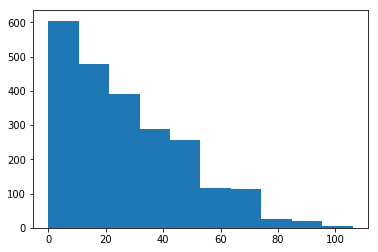

In [56]:
plt.hist(index_sorted % 1000)

In [57]:
index_sorted

array([    0,     1,     2,    24,    25,    26,    27,    45,    46,
        2004,  2005,  2006,  2007,  2008,  2009,  2022,  2023,  2024,
        2025,  2026,  2027,  2028,  5000,  5001,  5002,  5003,  5004,
        5005,  5006,  5007,  5008,  5009,  5010,  5011,  5012,  5013,
        5014,  5015,  5016,  5017,  5018,  5019,  5020,  5021,  5022,
        5023,  5024,  5025,  5026,  5027,  5028,  5029,  5030,  5031,
        5032,  5033,  5034,  5035,  5036,  5037,  5038,  5039,  5040,
        5041,  5042,  5043,  5044,  5045,  5046,  5047,  5048,  5049,
        5050,  5064,  5065,  5066,  8000,  8001,  8002,  8003,  8004,
        8005,  8006,  8007,  8008,  8009,  9000,  9001, 10000, 10001,
       10002, 11000, 11001, 11002, 11003, 11004, 11005, 11006, 11007,
       11008, 11009, 11010, 11011, 11012, 11013, 11014, 11015, 11016,
       11017, 11018, 11019, 11020, 11021, 11022, 11023, 11024, 11025,
       11026, 11027, 11028, 11029, 11030, 11031, 11032, 11033, 11034,
       11035, 11036,

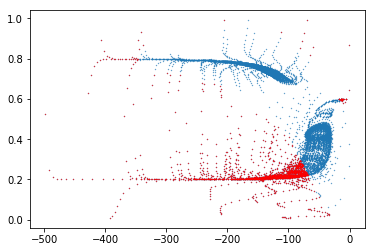

In [89]:
plt.scatter(X[:,0],X[:,1],s=0.1)
#plt.plot(X[large_error_index,0],X[large_error_index,1],'r.',markersize=0.5)
#plt.scatter(X[large_error_index,0],X[large_error_index,1],s=0.1,c='r')
th = 2000
plt.scatter(X[sort_index[:th],0],X[sort_index[:th],1],s=0.1,c='r')

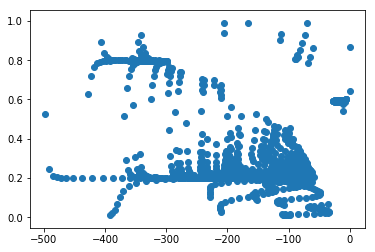

In [45]:
plt.scatter(X[large_error_index,0],X[large_error_index,1])

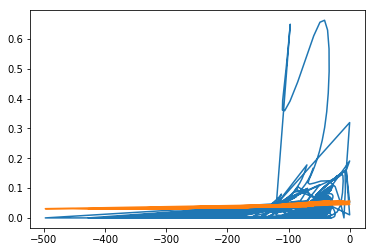

In [16]:
plt.plot(X[:,0],Y[:,4])
plt.plot(X[:,0],pred[:,4])

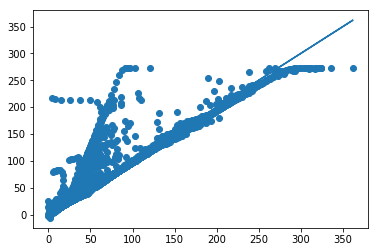

In [17]:
plt.scatter(Y[:,0],pred[:,0])
plt.plot(Y[:,0],Y[:,0])

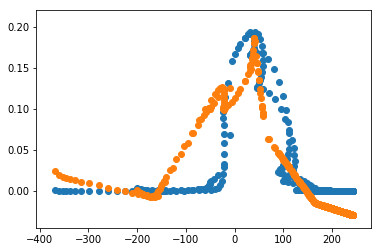

In [152]:
plt.scatter(X[0:2000,0],Y[0:2000,4])
plt.scatter(X[0:2000,0],pred[0:2000,4])

[-600, 300, 1e-07, 100.0]

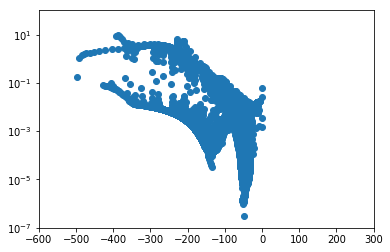

In [19]:
plt.scatter(X[:,0],rel_error)
plt.yscale('log')
plt.axis([-600,300,1e-7,1e2])

[-600, 300, 1e-07, 1.0]

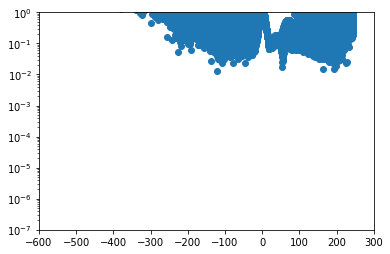

In [96]:
plt.scatter(X[:,0],rel_diff_seq)
plt.yscale('log')
plt.axis([-600,300,1e-7,1e0])

[-600, 300, 0.0001, 100000.0]

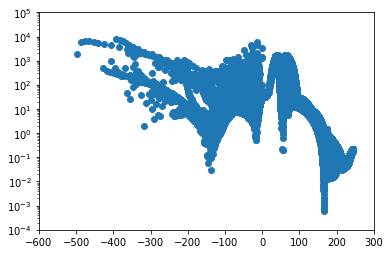

In [95]:
plt.scatter(X[:,0],diff_seq)
plt.yscale('log')
plt.axis([-600,300,1e-4,1e5])

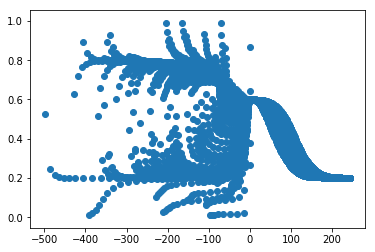

In [37]:
plt.scatter(X[:,0],X[:,1])

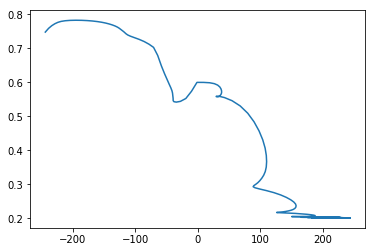

In [38]:
plt.plot(X[1000:2000,0],X[1000:2000,1])